,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


Accuracy: 0.7833333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82        36
           1       0.72      0.75      0.73        24

    accuracy                           0.78        60
   macro avg       0.77      0.78      0.78        60
weighted avg       0.79      0.78      0.78        60

Confusion Matrix:
 [[29  7]
 [ 6 18]]


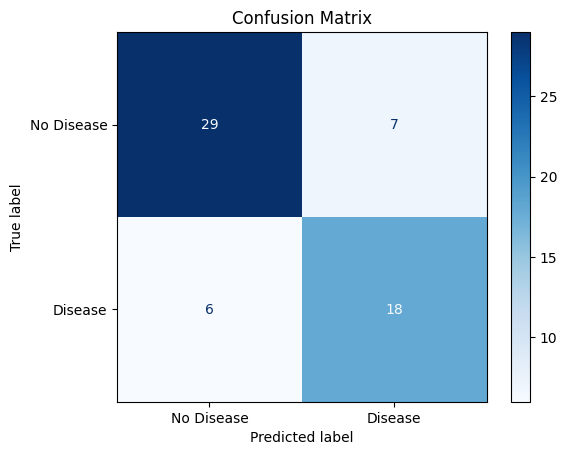

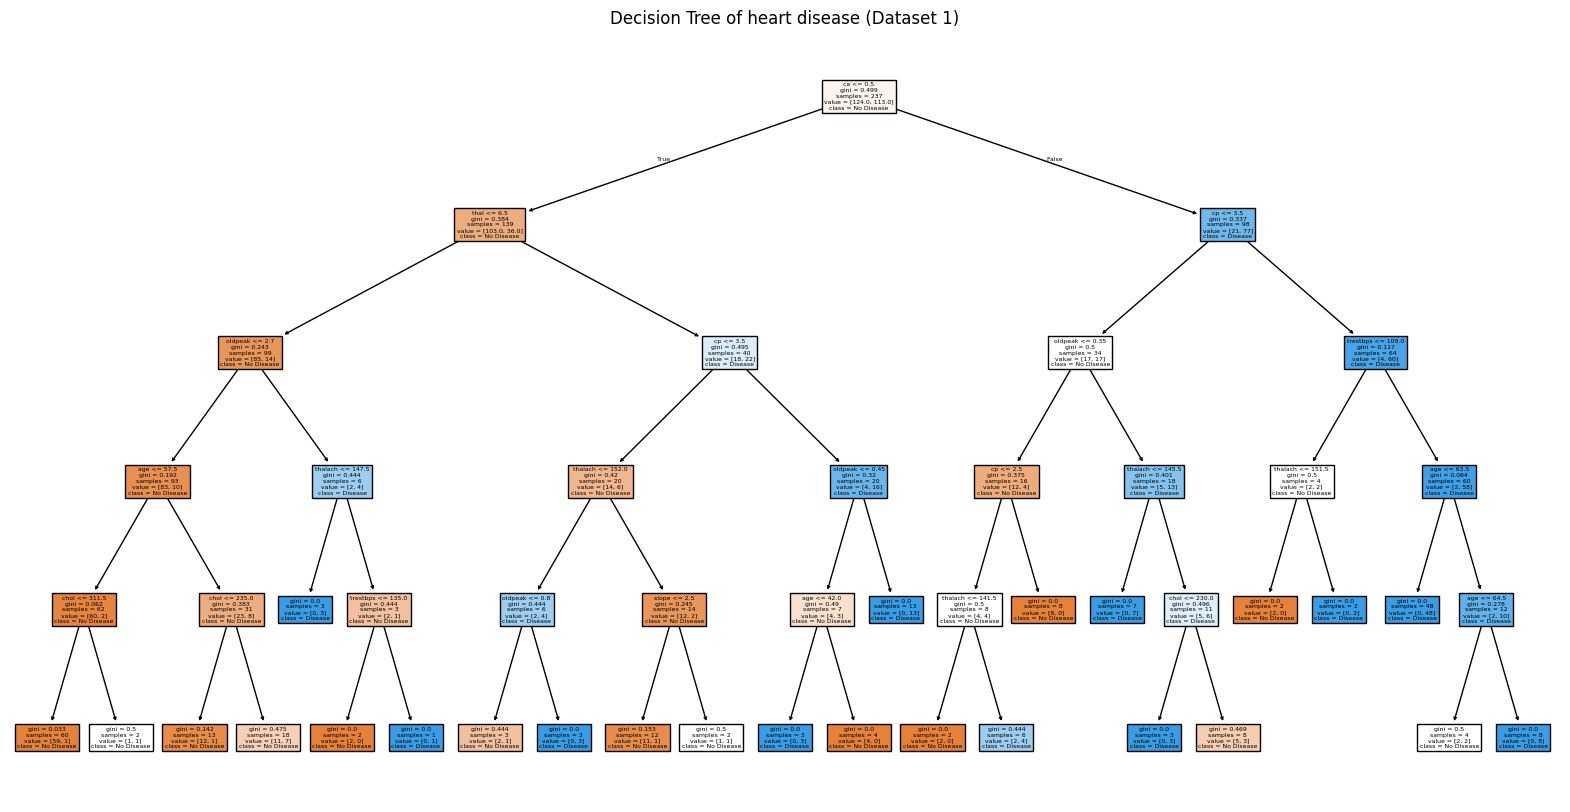

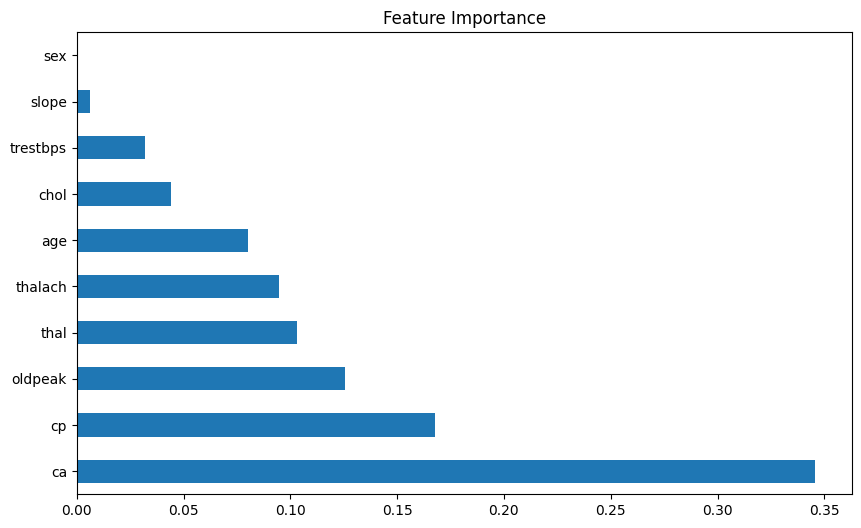

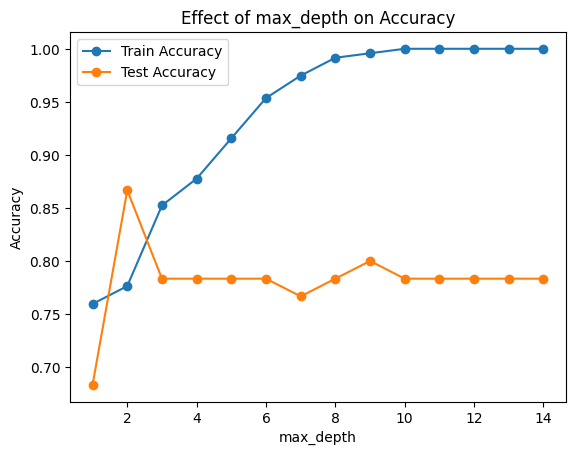

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, ConfusionMatrixDisplay)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Load dataset
url = "CSC14003_Decision_Tree/data/processed.cleveland.data"
columns = [
    "age",
    "sex",
    "cp",
    "trestbps",
    "chol",
    "fbs",
    "restecg",
    "thalach",
    "exang",
    "oldpeak",
    "slope",
    "ca",
    "thal",
    "target",
]

# Missing values are marked as '?'
df = pd.read_csv(url, names=columns, na_values="?")

display(df)
# Drop rows with missing values
df = df.dropna()

# Convert target to binary: 0 - no disease, 1 - disease
df["target"] = df["target"].apply(lambda x: 1 if x > 0 else 0)

# Split features and target
X = df.drop("target", axis=1)
y = df["target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Decision Tree
clf = DecisionTreeClassifier(random_state=42, max_depth=5)
clf.fit(X_train, y_train)

# Prediction
y_pred = clf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
disp = ConfusionMatrixDisplay.from_estimator(
    clf, X_test, y_test, display_labels=["No Disease", "Disease"], cmap=plt.cm.Blues, normalize=None
)
plt.title("Confusion Matrix")
plt.show()

# Visualization
plt.figure(figsize=(20, 10))
plot_tree(
    clf, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True
)
plt.title("Decision Tree of heart disease (Dataset 1)")
plt.show()

# Plot feature importance
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
feat_importances.nlargest(10).plot(kind="barh")
plt.title("Feature Importance")
plt.show()

# Analyze max depth
train_accuracies = []
test_accuracies = []
depth_range = range(1, 15)

for depth in depth_range:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    train_accuracies.append(model.score(X_train, y_train))
    test_accuracies.append(model.score(X_test, y_test))

plt.figure()
plt.plot(depth_range, train_accuracies, label="Train Accuracy", marker="o")
plt.plot(depth_range, test_accuracies, label="Test Accuracy", marker="o")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Effect of max_depth on Accuracy")
plt.show()


Train Ratio: 0.8
Accuracy: 1.0
Confusion Matrix:
 [[29  0  0]
 [ 0 14  0]
 [ 0  0 24]]


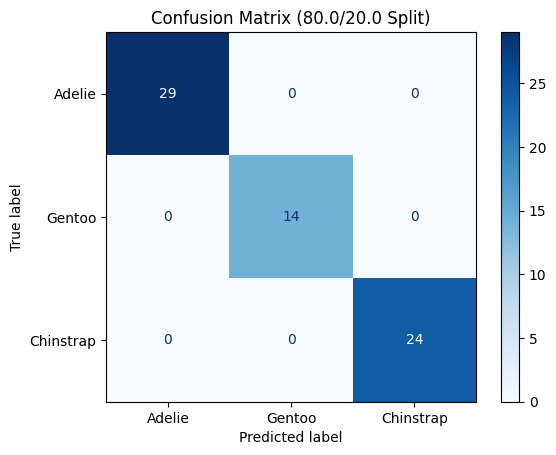

Classification Report:
               precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



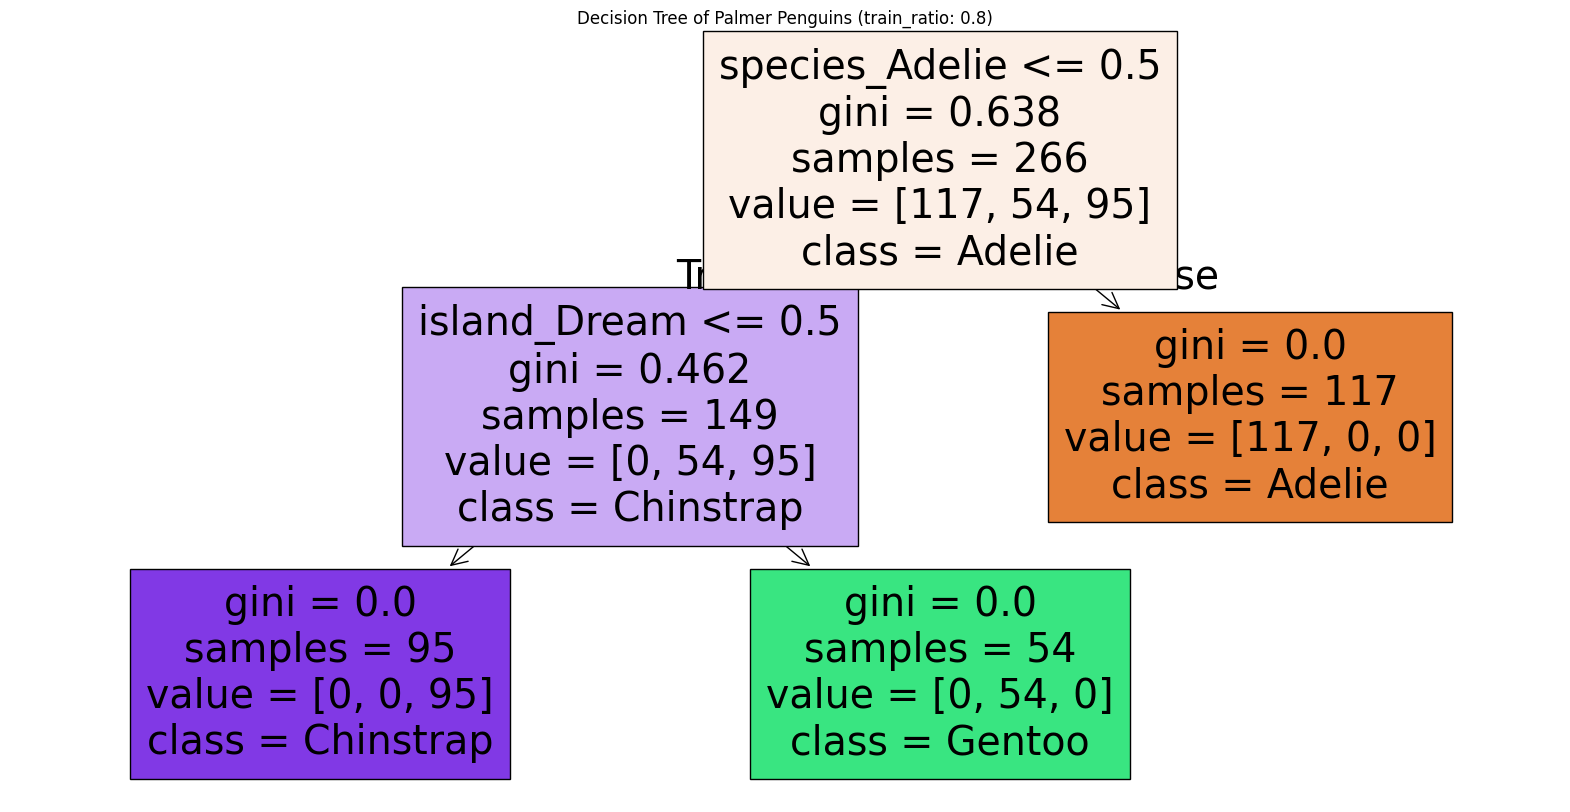

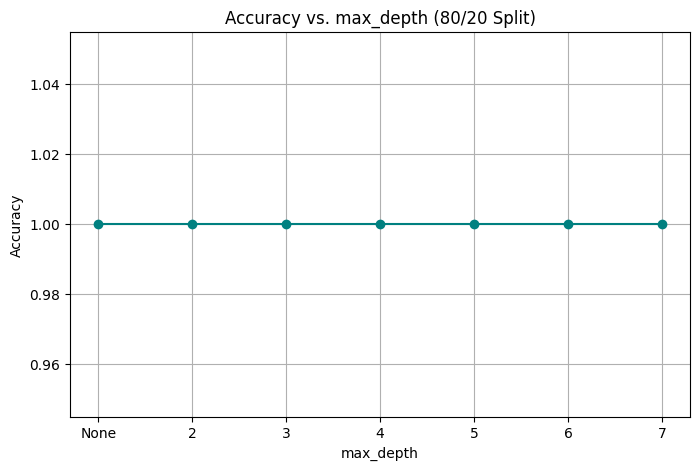

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, ConfusionMatrixDisplay)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Load dataset
url = "CSC14003_Decision_Tree/data/penguins.csv"
df = pd.read_csv(url)
# df = sns.load_dataset("penguins")

# Drop rows with missing values
df = df.dropna()

# Feature selection
X = df.drop(columns=["species"])
X = df.drop(columns=["year"])
y = df["species"]

# Convert categorical features
X = pd.get_dummies(X)

# Train test split
splits = [0.8]
split_results = {}

for train_ratio in splits:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=train_ratio, stratify=y, random_state=42, shuffle=True
    )

    split_results[train_ratio] = {
        "X_train": X_train,
        "X_test": X_test,
        "y_train": y_train,
        "y_test": y_test,
    }

for train_ratio, data in split_results.items():
    X_train = data["X_train"]
    X_test = data["X_test"]
    y_train = data["y_train"]
    y_test = data["y_test"]

    # Train Decision Tree
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # Predict
    y_pred = clf.predict(X_test)

    # Evaluation
    print(f"Train Ratio: {train_ratio}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    disp = ConfusionMatrixDisplay.from_estimator(
        clf, X_test, y_test, display_labels=["Adelie", "Gentoo", "Chinstrap"], cmap=plt.cm.Blues, normalize=None
    )
    plt.title(f"Confusion Matrix ({train_ratio * 100}/{100 - train_ratio * 100} Split)")
    plt.show()
    print("Classification Report:\n", classification_report(y_test, y_pred))


    #Plot Decision Tree
    plt.figure(figsize=(20, 10))
    plot_tree(clf, feature_names=X.columns, class_names=["Adelie", "Gentoo", "Chinstrap"], filled=True)
    plt.title("Decision Tree of Palmer Penguins (train_ratio: {})".format(train_ratio))
    plt.show()

# Analyze max_depth
split_80_20 = split_results[0.8]
X_train = split_80_20["X_train"]
X_test = split_80_20["X_test"]
y_train = split_80_20["y_train"]
y_test = split_80_20["y_test"]

max_depths = [None, 2, 3, 4, 5, 6, 7]
test_accuracy_results = []

for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    test_accuracy_results.append({
        "max_depth": "None" if depth is None else depth,
        "accuracy": accuracy_score(y_test, y_pred),
    })

accuracy_df = pd.DataFrame(test_accuracy_results)

plt.figure(figsize=(8, 5))
depth_labels = [str(depth) for depth in max_depths]
plt.plot(depth_labels, accuracy_df["accuracy"], marker='o', color='teal')
plt.title("Accuracy vs. max_depth (80/20 Split)")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()
